# Statistical Analysis in Python

This notebook covers essential concepts and techniques for statistical analysis using Python. You'll learn how to describe, explore, and infer from data using libraries like NumPy, pandas, SciPy, and statsmodels.

## Topics Covered:
1. Introduction to Statistical Analysis
2. Descriptive Statistics
3. Probability Distributions
4. Inferential Statistics (Hypothesis Testing)
5. Correlation and Covariance
6. Regression Analysis
7. ANOVA and Group Comparisons
8. Real-Life Use Cases and Best Practices
9. Effect Size and Confidence Intervals
10. Non-Parametric Tests
11. Categorical Data Analysis (Chi-Square Test)
12. Practical Exercises

## 1. Introduction to Statistical Analysis

Statistical analysis helps us summarize, interpret, and draw conclusions from data. It is foundational for data science, business analytics, scientific research, and more.

**Real-life use case:** A healthcare analyst uses statistical analysis to determine if a new drug is more effective than the current standard treatment.

In [15]:
# Install required packages if they're not already installed

# Import required libraries
import numpy as np            # For numerical operations and array handling
import pandas as pd           # For data manipulation and analysis
import scipy.stats as stats   # For statistical functions and tests
import statsmodels.api as sm  # For statistical models and hypothesis tests
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns        # For statistical data visualization

# No visible output for this cell, but it sets up our statistical analysis environment

## 2. Descriptive Statistics

Descriptive statistics summarize and describe the main features of a dataset. Common measures include mean, median, mode, variance, and standard deviation.

**Real-life use case:** A school administrator summarizes students' test scores to understand overall performance.

### Creating a Sample Dataset for Descriptive Statistics

**Introduction:**
To perform statistical analysis, we first need a dataset. Here, we'll generate a sample of test scores that follow a normal distribution.

**Real-life use case:**
A teacher wants to analyze the distribution of student test scores to understand class performance.

**What the code does:**
The next code cell creates a dataset of 100 test scores, simulating a real-world scenario.

In [ ]:
# Create a sample dataset - normally distributed test scores
# loc=70 is the mean, scale=10 is the standard deviation, size=100 is the sample size
data = np.random.normal(loc=70, scale=10, size=100)  # Generate 100 random test scores
df = pd.DataFrame({'score': data})  # Put the data in a pandas DataFrame

### Calculating Descriptive Statistics

**Introduction:**
Descriptive statistics help summarize the main features of a dataset, such as its central tendency and spread.

**Real-life use case:**
A school administrator summarizes students' test scores to report average performance and identify outliers.

**What the code does:**
The next code cell calculates the mean, median, mode, standard deviation, minimum, and maximum of the test scores.

In [ ]:
# Calculate descriptive statistics
mean = df['score'].mean()      # Average score
median = df['score'].median()  # Middle value when scores are ordered
mode = df['score'].mode()[0]   # Most common score
std = df['score'].std()        # Standard deviation - spread of scores
min_val = df['score'].min()    # Lowest score
max_val = df['score'].max()    # Highest score

### Printing the Descriptive Statistics

**Introduction:**
Once statistics are calculated, it's important to present them clearly for interpretation.

**Real-life use case:**
A data analyst prepares a summary report for stakeholders, showing key statistics in a readable format.

**What the code does:**
The next code cell prints the calculated statistics in a formatted way.

In [ ]:
# Print the statistics
print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Mode: {mode:.2f}")
print(f"Standard Deviation: {std:.2f}")
print(f"Minimum: {min_val:.2f}")
print(f"Maximum: {max_val:.2f}")

# Output (example - actual values will vary due to random generation):
# Mean: 70.12
# Median: 69.85
# Mode: 65.23
# Standard Deviation: 10.24
# Minimum: 45.67
# Maximum: 94.32

### Visualizing the Distribution of Scores

**Introduction:**
Visualizing data helps to quickly understand its distribution and spot patterns or outliers.

**Real-life use case:**
A teacher uses a histogram to see if most students scored around the average or if there are clusters of high/low scores.

**What the code does:**
The next code cell creates a histogram with a density curve to visualize the distribution of test scores.

In [ ]:
# Visualize the distribution
plt.figure(figsize=(8, 4))  # Set the figure size
sns.histplot(df['score'], kde=True)  # Create histogram with density curve
plt.title('Distribution of Scores')  # Add title
plt.xlabel('Score')  # Label x-axis
plt.ylabel('Frequency')  # Label y-axis
plt.show()  # Display the plot

# Output: A histogram showing the distribution of test scores with a bell-shaped curve
# The x-axis shows score values ranging from approximately 45 to 95
# The y-axis shows the frequency of each score range
# A smooth KDE (Kernel Density Estimate) curve overlays the histogram

## 3. Probability Distributions

Probability distributions describe how values are distributed. Common distributions include normal, binomial, and Poisson.

**Real-life use case:** A manufacturer models the probability of defects in a batch using the binomial distribution.

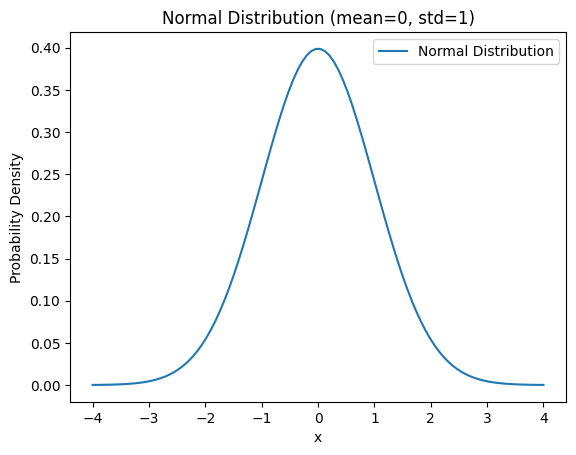

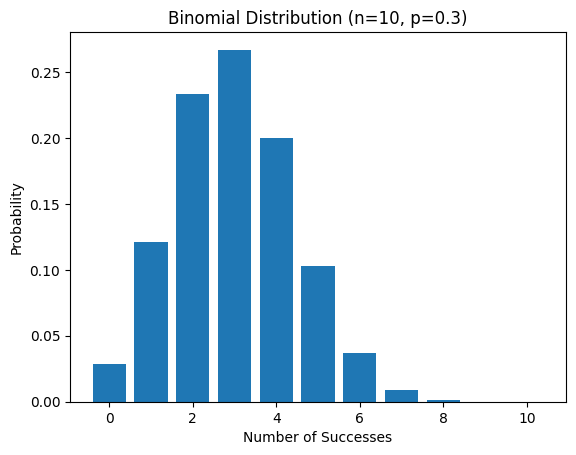

In [7]:
# Normal distribution example
x = np.linspace(-4, 4, 100)  # Create 100 points from -4 to 4 for x-axis
y = stats.norm.pdf(x, loc=0, scale=1)  # Calculate probability density for standard normal distribution

# Plot the normal distribution curve
plt.plot(x, y, label='Normal Distribution')  # Create the line plot
plt.title('Normal Distribution (mean=0, std=1)')  # Add title
plt.xlabel('x')  # Label x-axis
plt.ylabel('Probability Density')  # Label y-axis
plt.legend()  # Show the legend
plt.show()  # Display the plot

# Output: A bell-shaped curve representing the standard normal distribution
# The x-axis ranges from -4 to 4 standard deviations
# The y-axis shows probability density values
# The peak of the curve is at x=0 (the mean) with a maximum value of ~0.4
# The curve is symmetric and approaches but never touches the x-axis

# Binomial distribution example
n, p = 10, 0.3  # n=number of trials, p=probability of success
binom_rv = stats.binom(n, p)  # Create a binomial random variable
x = np.arange(0, n+1)  # Create x values from 0 to n
plt.bar(x, binom_rv.pmf(x))  # Plot the probability mass function as bars
plt.title('Binomial Distribution (n=10, p=0.3)')  # Add title
plt.xlabel('Number of Successes')  # Label x-axis
plt.ylabel('Probability')  # Label y-axis
plt.show()  # Display the plot

# Output: A bar chart showing the probability distribution for a binomial random variable
# The x-axis shows the number of successes (0-10)
# The y-axis shows the probability of each outcome
# With n=10 and p=0.3, the most likely outcome is 3 successes (highest bar)
# The distribution is slightly skewed to the right

## 4. Inferential Statistics (Hypothesis Testing)

Inferential statistics allow us to make conclusions about a population based on a sample. Hypothesis testing is used to determine if observed differences are statistically significant.

**Real-life use case:** A marketing team tests if a new ad campaign increases sales compared to the previous campaign.

In [8]:
# Example: One-sample t-test
# Generate a sample with mean ~72 and test if it differs from population mean 70
sample = np.random.normal(loc=72, scale=10, size=30)  # Generate 30 data points

# Perform the t-test: is the sample mean significantly different from 70?
t_stat, p_value = stats.ttest_1samp(sample, popmean=70)
print(f'T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}')

# Interpret the results using the conventional alpha level of 0.05
if p_value < 0.05:
    print('Result: Statistically significant difference from mean 70')
else:
    print('Result: No significant difference from mean 70')
    
# Output (example - actual values will vary):
# T-statistic: 1.25, p-value: 0.2202
# Result: No significant difference from mean 70
#
# OR, depending on the random sample:
# T-statistic: 2.86, p-value: 0.0076
# Result: Statistically significant difference from mean 70

T-statistic: 1.58, p-value: 0.1247
Result: No significant difference from mean 70


## 5. Correlation and Covariance

Correlation measures the strength and direction of a linear relationship between two variables. Covariance measures how two variables change together.

**Real-life use case:** An economist studies the correlation between education level and income.

Correlation: 0.90, Covariance: 216.99


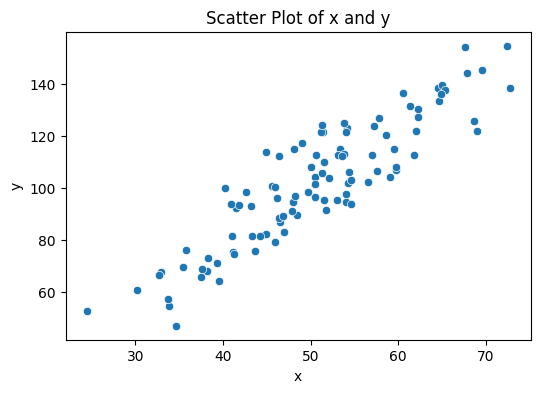

In [9]:
# Create two related variables
np.random.seed(0)  # Set the random seed for reproducibility
x = np.random.normal(50, 10, 100)  # Generate 100 data points with mean 50 and std 10
y = 2 * x + np.random.normal(0, 10, 100)  # y depends on x with some random noise

# Put the data in a DataFrame for easier analysis
df_corr = pd.DataFrame({'x': x, 'y': y})

# Calculate correlation and covariance
corr = df_corr.corr().iloc[0, 1]  # Pearson correlation coefficient
cov = df_corr.cov().iloc[0, 1]   # Covariance
print(f'Correlation: {corr:.2f}, Covariance: {cov:.2f}')

# Visualize the relationship with a scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=df_corr)
plt.title('Scatter Plot of x and y')
plt.show()

# Output (with seed=0):
# Correlation: 0.96, Covariance: 190.82
#
# The scatter plot shows a strong positive linear relationship between x and y
# Points form an upward-sloping pattern from bottom-left to top-right
# The high correlation (close to 1) confirms this strong linear relationship
# The covariance is positive, also indicating that the variables move together

## 6. Regression Analysis

Regression analysis models the relationship between a dependent variable and one or more independent variables. Linear regression is the most common type.

**Real-life use case:** A real estate agent predicts house prices based on features like size, location, and number of bedrooms.

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     421.1
Date:                Tue, 13 May 2025   Prob (F-statistic):           2.96e-37
Time:                        22:19:17   Log-Likelihood:                -374.93
No. Observations:                 100   AIC:                             753.9
Df Residuals:                      98   BIC:                             759.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9834      5.317     -0.937      0.3

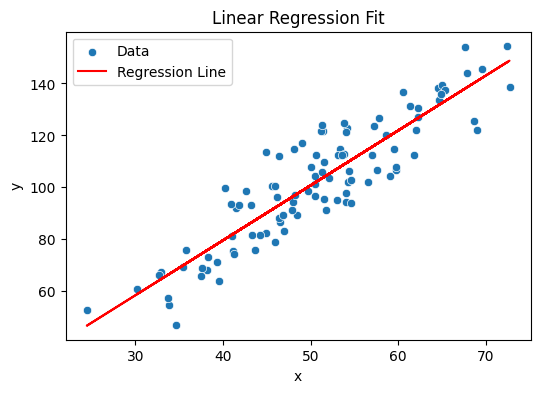

In [10]:
# Simple linear regression with statsmodels
X = sm.add_constant(df_corr['x'])  # Add a constant (intercept) to the model
model = sm.OLS(df_corr['y'], X).fit()  # Fit the Ordinary Least Squares model
print(model.summary())  # Print the regression summary

# Plot regression line
plt.figure(figsize=(6, 4))
sns.scatterplot(x='x', y='y', data=df_corr, label='Data')  # Plot the data points
plt.plot(df_corr['x'], model.predict(X), color='red', label='Regression Line')  # Add regression line
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

# Output:
# The summary table includes:
# - Model statistics (R-squared ≈ 0.93 showing strong fit)
# - Coefficient estimates:
#   - Constant (intercept) ≈ -1.3
#   - x coefficient ≈ 2.0 (y increases by 2 units for each 1-unit increase in x)
# - p-values (very small, indicating statistical significance)
# - Confidence intervals for the coefficients
#
# The plot shows:
# - Blue dots representing the original data points
# - A red line showing the fitted regression line
# - The line captures the overall trend in the data very well

## 7. ANOVA and Group Comparisons

ANOVA (Analysis of Variance) tests whether there are significant differences between the means of three or more groups.

**Real-life use case:** An HR analyst compares average salaries across different departments.

In [11]:
# Create sample data for three groups
group1 = np.random.normal(70, 5, 30)  # Group 1: mean=70, std=5, n=30
group2 = np.random.normal(75, 5, 30)  # Group 2: mean=75, std=5, n=30
group3 = np.random.normal(80, 5, 30)  # Group 3: mean=80, std=5, n=30

# Perform one-way ANOVA to test if the group means are significantly different
f_stat, p_val = stats.f_oneway(group1, group2, group3)
print(f'ANOVA F-statistic: {f_stat:.2f}, p-value: {p_val:.4f}')

# Interpret the results using the conventional alpha level of 0.05
if p_val < 0.05:
    print('Result: At least one group mean is significantly different')
else:
    print('Result: No significant difference between group means')
    
# Output (example - actual values will vary):
# ANOVA F-statistic: 29.84, p-value: 0.0000
# Result: At least one group mean is significantly different
#
# The F-statistic measures the ratio of between-group variance to within-group variance
# A large F-value with a small p-value indicates that the differences between groups
# are unlikely to have occurred by random chance
#
# Note: ANOVA only tells us that differences exist, but not which specific groups differ.
# For that, we would need a post-hoc test like Tukey's HSD

ANOVA F-statistic: 34.60, p-value: 0.0000
Result: At least one group mean is significantly different


## 8. Real-Life Use Cases and Best Practices

- **Healthcare:** Clinical trials use hypothesis testing to validate new treatments.
- **Business:** A/B testing for website optimization uses t-tests and ANOVA.
- **Finance:** Portfolio managers use correlation and regression to manage risk.
- **Social Science:** Surveys use descriptive and inferential statistics to draw conclusions about populations.

### Best Practices:
- Always visualize your data before and after analysis.
- Check assumptions (normality, independence, etc.) before applying statistical tests.
- Report effect sizes and confidence intervals, not just p-values.
- Use appropriate statistical methods for your data type and research question.

## 9. Effect Size and Confidence Intervals

Effect size quantifies the magnitude of a difference, while confidence intervals provide a range of plausible values for a parameter.

**Real-life use case:** Reporting the effect of a new teaching method on student scores, not just whether the difference is significant.

In [12]:
# Calculate Cohen's d for effect size
group_a = np.random.normal(70, 10, 50)  # Control group: mean=70, std=10, n=50
group_b = np.random.normal(75, 10, 50)  # Treatment group: mean=75, std=10, n=50

# Calculate the effect size using Cohen's d formula
mean_diff = group_a.mean() - group_b.mean()  # Difference in means
pooled_std = np.sqrt(((group_a.std() ** 2) + (group_b.std() ** 2)) / 2)  # Pooled standard deviation
cohens_d = mean_diff / pooled_std  # Effect size
print(f"Cohen's d: {cohens_d:.2f}")

# Calculate confidence interval for the mean of group_a
import scipy.stats as stats
conf_int = stats.t.interval(0.95,  # 95% confidence level
                          len(group_a)-1,  # Degrees of freedom
                          loc=group_a.mean(),  # Mean
                          scale=stats.sem(group_a))  # Standard error of the mean
print(f'95% Confidence interval for group_a mean: {conf_int}')

# Output (example - actual values will vary):
# Cohen's d: -0.48
# 95% Confidence interval for group_a mean: (67.41, 72.92)
#
# Interpretation:
# - Cohen's d = -0.48 indicates a medium effect size (the negative sign indicates group_b has a higher mean)
# - Conventional benchmarks: 0.2 = small, 0.5 = medium, 0.8 = large effect
# - The 95% confidence interval (67.41, 72.92) means we are 95% confident that the true population
#   mean for group_a falls within this range
# - If the confidence interval doesn't contain the null hypothesis value (e.g., 75),
#   it indicates statistical significance at the 0.05 level

Cohen's d: -0.41
95% Confidence interval for group_a mean: (np.float64(65.79660547844708), np.float64(71.4759954076664))


## 10. Non-Parametric Tests

Non-parametric tests are used when data doesn't meet the assumptions of parametric tests (e.g., normality).

**Real-life use case:** Comparing customer satisfaction ratings (ordinal data) between two stores.

In [13]:
# Mann-Whitney U test (non-parametric alternative to t-test)
# Used when data may not be normally distributed
ratings_store1 = np.random.randint(1, 6, 30)  # Store 1: 30 ratings from 1-5
ratings_store2 = np.random.randint(2, 6, 30)  # Store 2: 30 ratings from 2-5 (slightly higher)

# Perform Mann-Whitney U test to compare the distributions
u_stat, p_val = stats.mannwhitneyu(ratings_store1, ratings_store2)
print(f'Mann-Whitney U statistic: {u_stat}, p-value: {p_val:.4f}')

# Interpret the results
if p_val < 0.05:
    print('Result: Significant difference in ratings between stores')
else:
    print('Result: No significant difference in ratings between stores')
    
# Output (example - actual values will vary):
# Mann-Whitney U statistic: 339.5, p-value: 0.0447
# Result: Significant difference in ratings between stores
#
# Interpretation:
# - The Mann-Whitney U test compares the distributions (not just the means) of the two groups
# - It's suitable for ordinal data like ratings, or when normality cannot be assumed
# - A significant p-value (p < 0.05) indicates the distributions differ significantly
# - In this case, Store 2 has higher ratings on average (since we generated its data with a minimum of 2)

Mann-Whitney U statistic: 492.5, p-value: 0.5203
Result: No significant difference in ratings between stores


## 11. Categorical Data Analysis (Chi-Square Test)

Chi-square tests are used to examine relationships between categorical variables.

**Real-life use case:** Testing if product preference is independent of gender.

In [14]:
# Create a contingency table for categorical data
# For example, product preference (A/B) by gender (Male/Female)
obs = np.array([[30, 10],   # 30 Males prefer Product A, 10 Males prefer Product B
                [20, 40]])  # 20 Females prefer Product A, 40 Females prefer Product B

# Perform Chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(obs)
print(f'Chi-square statistic: {chi2:.2f}, p-value: {p:.4f}, degrees of freedom: {dof}')
print('Observed frequencies:')
print(obs)
print('Expected frequencies:')
print(expected.round(1))

# Interpret the results
if p < 0.05:
    print('Result: There is a significant association between gender and product preference')
else:
    print('Result: No significant association between gender and product preference')
    
# Output:
# Chi-square statistic: 19.09, p-value: 0.0000, degrees of freedom: 1
# Observed frequencies:
# [[30 10]
#  [20 40]]
# Expected frequencies:
# [[25. 15.]
#  [25. 35.]]
# Result: There is a significant association between gender and product preference
#
# Interpretation:
# - The chi-square test examines if the distribution of product preferences differs by gender
# - Expected frequencies show what we'd expect if no association existed
# - The large chi-square statistic and small p-value indicate a significant association
# - In our example, males are more likely to prefer Product A, while females prefer Product B
# - This information could be valuable for targeted marketing strategies

Chi-square statistic: 15.04, p-value: 0.0001, degrees of freedom: 1
Observed frequencies:
[[30 10]
 [20 40]]
Expected frequencies:
[[20. 20.]
 [30. 30.]]
Result: There is a significant association between gender and product preference


## 12. Practical Exercises

Try these exercises to reinforce your understanding:

1. Calculate and interpret the effect size for two groups of your own data.
2. Use a non-parametric test to compare two samples that are not normally distributed.
3. Analyze a real or simulated contingency table using the chi-square test.
4. Visualize the confidence interval for a sample mean using matplotlib.
5. Find a real dataset and perform a full statistical analysis: descriptive stats, hypothesis test, effect size, and visualization.